# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [18]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [19]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [20]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


## Modelo

In [21]:
model = torch.nn.Linear(28*28, 10)

In [22]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.4318,  0.4964, -0.3388, -0.0923,  0.4867,  0.6259, -0.4971,  0.3660,
          1.2209, -0.0186]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [23]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [24]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [25]:
print('Final loss:', loss.data)

Final loss: tensor(0.2613)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

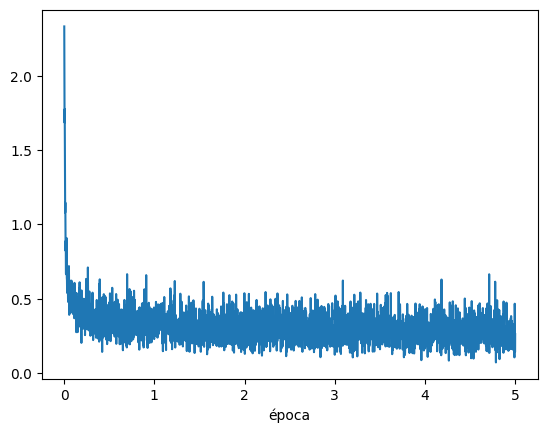

In [26]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

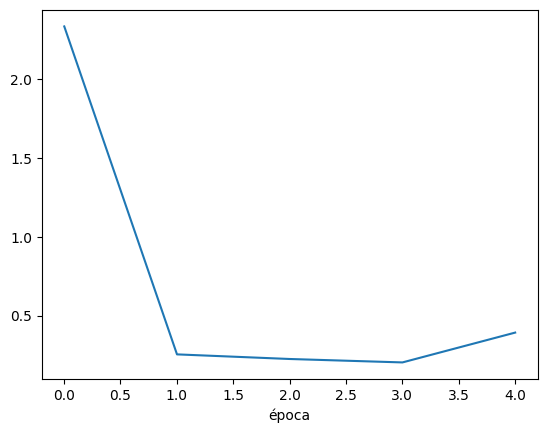

In [27]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

**Q1. Qual é o tamanho do mini-batch?**

R.: batch_size = 100

**Q2. Em uma época, quantos mini-batches existem?**

R.: Há 600 mini-batches, pois o nº de mini-batches por época é a quantidade de imagens para treino / tamanho do mini-batch => 60000/100​=600

**Q3. Qual é a definição de época?**

R.: É um ciclo completo em que a rede neural vê todos os exemplos do conjunto de treinamento uma vez.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600

In [28]:
model = torch.nn.Linear(28*28, 10)

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)


epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print(f"Época: {i+1}/{n_epochs}, batch: {k+1}/{len(loader_train)}")

Época: 1/5, batch: 1/600
Época: 1/5, batch: 2/600
Época: 1/5, batch: 3/600
Época: 1/5, batch: 4/600
Época: 1/5, batch: 5/600
Época: 1/5, batch: 6/600
Época: 1/5, batch: 7/600
Época: 1/5, batch: 8/600
Época: 1/5, batch: 9/600
Época: 1/5, batch: 10/600
Época: 1/5, batch: 11/600
Época: 1/5, batch: 12/600
Época: 1/5, batch: 13/600
Época: 1/5, batch: 14/600
Época: 1/5, batch: 15/600
Época: 1/5, batch: 16/600
Época: 1/5, batch: 17/600
Época: 1/5, batch: 18/600
Época: 1/5, batch: 19/600
Época: 1/5, batch: 20/600
Época: 1/5, batch: 21/600
Época: 1/5, batch: 22/600
Época: 1/5, batch: 23/600
Época: 1/5, batch: 24/600
Época: 1/5, batch: 25/600
Época: 1/5, batch: 26/600
Época: 1/5, batch: 27/600
Época: 1/5, batch: 28/600
Época: 1/5, batch: 29/600
Época: 1/5, batch: 30/600
Época: 1/5, batch: 31/600
Época: 1/5, batch: 32/600
Época: 1/5, batch: 33/600
Época: 1/5, batch: 34/600
Época: 1/5, batch: 35/600
Época: 1/5, batch: 36/600
Época: 1/5, batch: 37/600
Época: 1/5, batch: 38/600
Época: 1/5, batch: 39

2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [29]:
def train_with_batch_size(batch_size, n_epochs, learningRate, train_dataset, total_samples):
    loader_train = DataLoader(train_dataset,
                              batch_size=batch_size,
                              shuffle=True)

    model = torch.nn.Linear(28*28, 10)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

    epochs = []
    losses = []

    total_trained_samples = 0

    for i in range(n_epochs):
        for k, (x_train, y_train) in enumerate(loader_train):
            inputs = x_train.view(-1, 28*28)

            # Forward
            outputs = model(inputs)
            # Loss
            loss = criterion(outputs, y_train)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_trained_samples += x_train.size(0)
            epochs.append(total_trained_samples / total_samples)
            losses.append(loss.item())

    return epochs, losses

In [30]:
batch_sizes = [50, 200, 500]
n_epochs = 5
learningRate = 0.1

histories = {}

total_samples = len(dataset_train)

for bs in batch_sizes:
    print(f"\nTreinando com batch_size = {bs}...")
    epochs_bs, losses_bs = train_with_batch_size(
        batch_size=bs,
        n_epochs=n_epochs,
        learningRate=learningRate,
        train_dataset=dataset_train,
        total_samples=total_samples
    )
    histories[bs] = (epochs_bs, losses_bs)



Treinando com batch_size = 50...

Treinando com batch_size = 200...

Treinando com batch_size = 500...


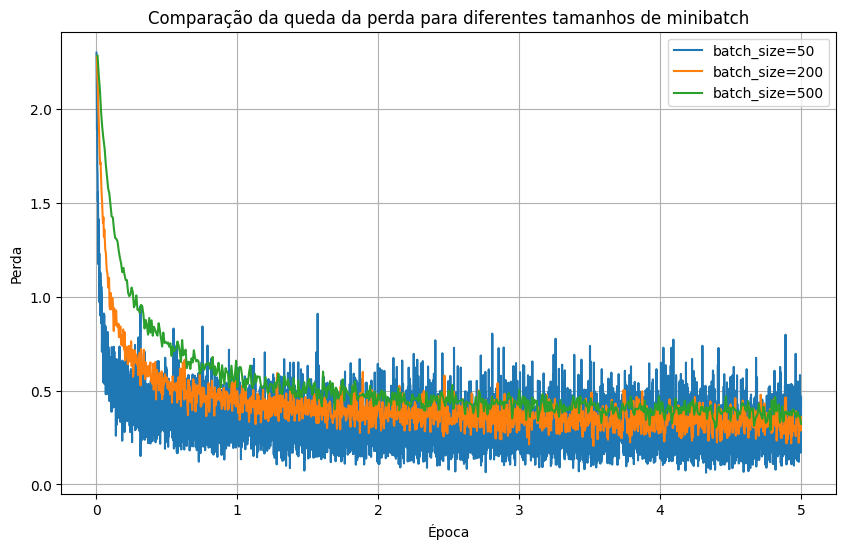

In [31]:
plt.figure(figsize=(10,6))

for bs in batch_sizes:
    epochs_bs, losses_bs = histories[bs]
    plt.plot(epochs_bs, losses_bs, label=f'batch_size={bs}')

plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Comparação da queda da perda para diferentes tamanhos de minibatch')
plt.legend()
plt.grid(True)
plt.show()